In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies & Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read files as Pandas DataFrames
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
# Inspecting City Data (null values, data types, options for city type)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Get count of values that are not null.
print(city_df.count())
print()
print(city_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64

city            0
driver_count    0
type            0
dtype: int64


In [5]:
# Get data types for each column.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get unique values for type of city.
city_types = city_df["type"].unique()
city_types

# Get number of data points for each type of city.
type_num = []
for city_type in city_types:
    num = sum(city_df["type"] == city_type)
    type_num.append({city_type:num})
type_num

[{'Urban': 66}, {'Suburban': 36}, {'Rural': 18}]

In [7]:
# Inspecting Ride Data (null values, data types)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [8]:
# Get count of values that are not null.
print(ride_df.count())
print()
print(ride_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

city       0
date       0
fare       0
ride_id    0
dtype: int64


In [9]:
# Get data types.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# Merge DataFrames on city column and display consolidated df.
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Bubble Chart: Avg Fare vs Total # of Rides (Bubble Size-Avg # of Drivers) for each City Type

In [11]:
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Create the Urban city DataFrame.
urban_df = pyber_df[pyber_df["type"]=="Urban"]
# Create the Suburban city DataFrame.
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]
# Create the Rural city DataFrame.
rural_df = pyber_df[pyber_df["type"]=="Rural"]

In [13]:
# Get total number of rides for each city within each city type.
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [14]:
# Get the average fare for each city within each city type.
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [15]:
# Get the average number of drivers for each city within each city type.
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

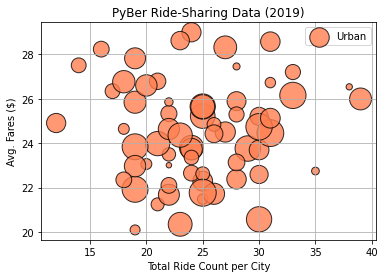

In [16]:
# Create scatter plot for urban cities.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s = [10*i for i in urban_driver_count],
           c = "coral",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

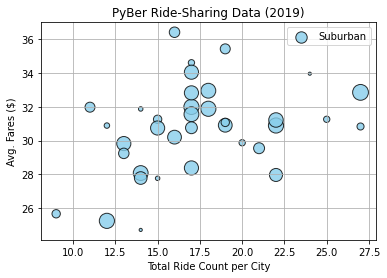

In [17]:
# Create scatter plot for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = [10*i for i in suburban_driver_count],
           c = "skyblue",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

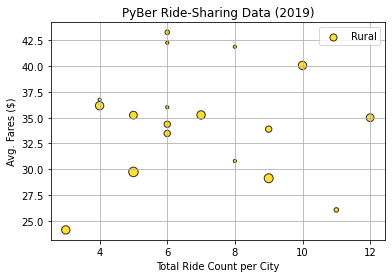

In [18]:
# Create scatter plot for rural cities.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = [10*i for i in rural_driver_count],
           c = "gold",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

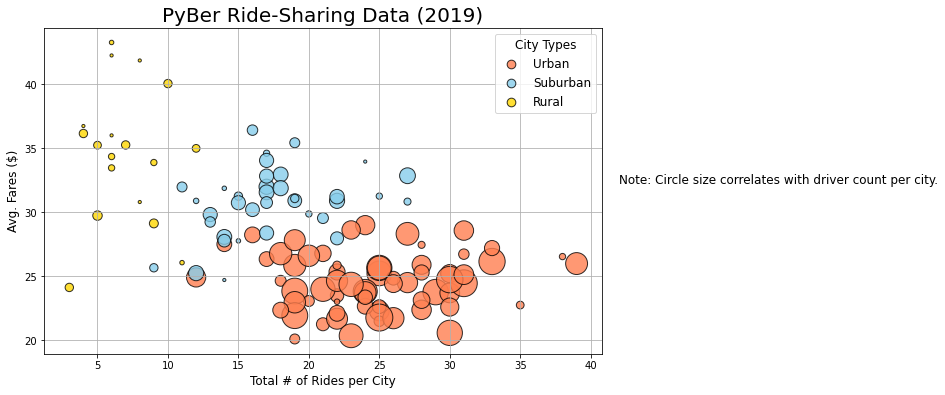

In [19]:
# Create combined bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s = [10*i for i in urban_driver_count],
           c = "coral",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = [10*i for i in suburban_driver_count],
           c = "skyblue",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = [10*i for i in rural_driver_count],
           c = "gold",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel("Total # of Rides per City", fontsize = 12)
plt.ylabel("Avg. Fares ($)", fontsize = 12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
for i in range(len(city_types)):
    lgnd.legendHandles[i]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 32.25, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png", bbox_inches="tight", transparent=False, facecolor="white")

# Show plot
plt.show()

Summary Statistics

In [20]:
# Using Pandas describe() function
urban_df.describe()
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [21]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [22]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [23]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [24]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [25]:
# Summary Stats for Average Fare by City Type
# Get fares for urban cities
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [26]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.
The median fare price for urban trips is $24.64.
The median fare price for suburban trips is $30.75.
The median fare price for rural trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [27]:
# Summary Stats for # of Drivers by City Type
urban_drivers = urban_df["driver_count"]
suburban_drivers = suburban_df["driver_count"]
rural_drivers = rural_df["driver_count"]

In [28]:
# Stats for # of Drivers (Urban Cities)
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

In [29]:
# Stats for # of Drivers (suburban Cities)
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

In [30]:
# Stats for # of Drivers (rural Cities)
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

In [31]:
mean_suburban_drivers

13.712

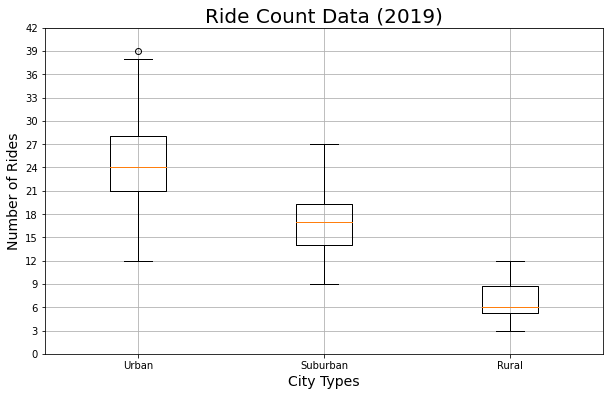

In [32]:
# Box and Whisker Plots for Ride Count Data
# Urban Cities
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png", facecolor="white")
plt.show()

In [33]:
# Find outlier city (ride count of 39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} is the urban city outlier with 39 total rides in 2019.")

West Angela is the urban city outlier with 39 total rides in 2019.


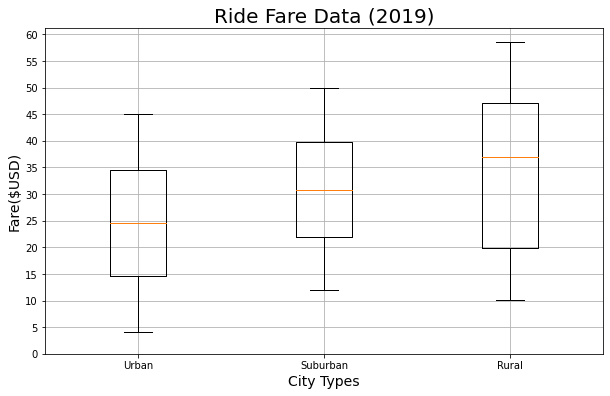

In [34]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png", facecolor="white")
plt.show()

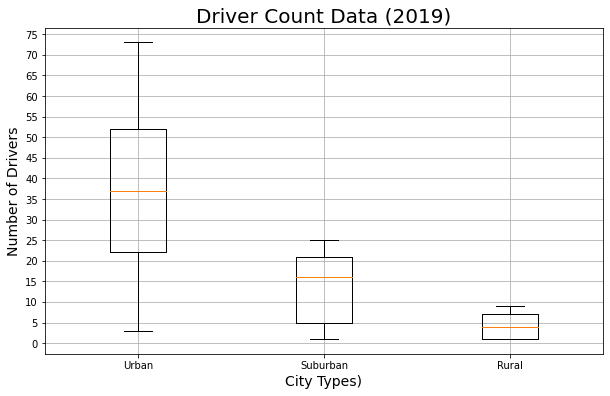

In [35]:
# Create the box-and-whisker plot for the driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types)', fontsize=14)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save figure
plt.savefig("analysis/Fig4.png", facecolor="white")
plt.show()

In [36]:
# Percentage of Fares for Each City Type (Pie Chart)
# Get total fares for each city type in 2019
# sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]

# Get combined total fares collected by PyBer in 2019
# total_fares = pyber_df["fare"].sum()

# Calculate percent of total fare for each city type
# type_fare_percentages = sum_fares_by_type / total_fares * 100

# Combine above steps into 1 line of code:
type_fare_percentages = 100* pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()
type_fare_percentages

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

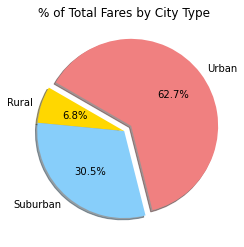

In [37]:
# Create Pie Chart
plt.pie(type_fare_percentages,
        labels=list(type_fare_percentages.index[0:3]),
        colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, .1],
       shadow=True,
       autopct="%.1f%%",
       startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig("analysis/Fig5.png", facecolor="white")
plt.show()

In [38]:
# Pie Chart: Percentage of Total Rides by City Type
# Get total rides by city type
type_ride_percentages = 100 * pyber_df.groupby(["type"]).count()["ride_id"] / len(pyber_df["ride_id"].unique())
type_ride_percentages

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

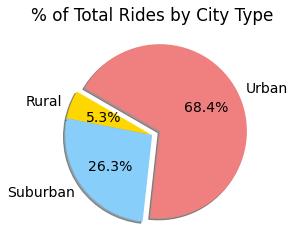

In [39]:
# Create Pie Chart
plt.pie(type_ride_percentages,
        labels=list(type_ride_percentages.index[0:3]),
        colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, .1],
       shadow=True,
       autopct="%.1f%%",
       startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig("analysis/Fig6.png", facecolor="white")
plt.show()

In [40]:
# Pie Chart: Percentage of Total Drivers by City Type
type_driver_percentages = 100 * pyber_df.groupby(["type"]).sum()["driver_count"] / pyber_df["driver_count"].sum()
type_driver_percentages

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

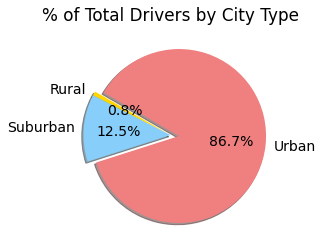

In [41]:
# Create Pie Chart
plt.pie(type_driver_percentages,
        labels=list(type_driver_percentages.index[0:3]),
        colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, .1],
       shadow=True,
       autopct="%.1f%%",
       startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save figure
plt.savefig("analysis/Fig7.png", facecolor="white")
plt.show()